## Ejercicio 1

Implementar el método de Euler:

In [1]:
# Definimos una función que nos regresa la lista de elementos de nuestro linspace para un t inicial, un t final y un separación h entre los elementos:

function listt(t0,tf,h)
    
    listt = linspace(t0,tf, Int(round((tf-t0)/h)))
    
    return listt
end

listt (generic function with 1 method)

In [2]:
# Definimos una función para resolver  una ecuación diferencial dada por f(x,t) usando el método de Euler. Los parámetros son la función f, una condición inicial x0 = x(t0), los limites del intervalo [t0,tf] y la separación entre los elementos del intervalo h.

function metodo_euler(f,x0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    
    h = listt[2]-listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0 
    
    # Hacemos un ciclo que nos guarde los valores de la función que satisface nuestra ecuación diferencial x evaluada en los puntos t_k usando el método de euler
    
    for i in 2:length(listt)
        
        x = x + h*f(listt[i-1], listx[i-1])
        listx[i] = x
        
    end
    
    return listt,listx
    
end

metodo_euler (generic function with 1 method)

Queremos resolver la ecuación diferencial

$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$

para $\alpha = 2.5$ y $h=1.0,0.5,0.2,0.01$. 

In [3]:
# Definimos la función que define nuestra ecuación diferencial

f(t,x) = -2.5*x

f (generic function with 1 method)

Primero, resolvamos para la condición inicial $x(0)=1$:

In [4]:
# Definimos nuestra lista de elementos para una separación h dada:

T1 = listt(0,8,1)
T2 = listt(0,8,0.5)
T3 = listt(0,8,0.2)
T4 = listt(0,8,0.01)

0.0:0.010012515644555695:8.0

In [5]:
# Definimos una lista cuyos elementos son x(t_k) para un valor de h dado, con nuestra condición inicial x0=1:

X1 = metodo_euler(f,1,T1)
X2 = metodo_euler(f,1,T2)
X3 = metodo_euler(f,1,T3)
X4 = metodo_euler(f,1,T4)

(0.0:0.010012515644555695:8.0, [1.0, 0.974969, 0.950564, 0.92677, 0.903572, 0.880954, 0.858903, 0.837403, 0.816442, 0.796006  …  2.00741e-9, 1.95716e-9, 1.90817e-9, 1.86041e-9, 1.81384e-9, 1.76844e-9, 1.72417e-9, 1.68101e-9, 1.63893e-9, 1.59791e-9])

Notemos que

In [6]:
X1[1]

0.0:1.1428571428571428:8.0

In [7]:
X1[2]

8-element Array{Float64,1}:
   1.0    
  -1.85714
   3.44898
  -6.40525
  11.8955 
 -22.0916 
  41.0272 
 -76.1934 

In [8]:
# Llamamos al paquete PyPlot para poder graficar nuestro datos:

using PyPlot

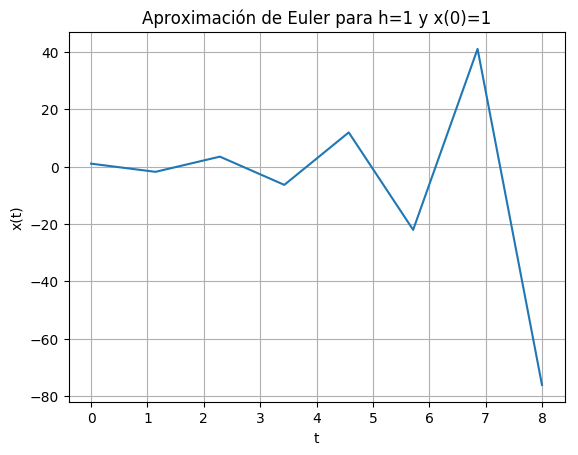

In [9]:
# Graficamos para h = 1.0

plot(X1[1],X1[2])

title("Aproximación de Euler para h=1 y x(0)=1")
xlabel("t")
ylabel("x(t)")

grid("on")

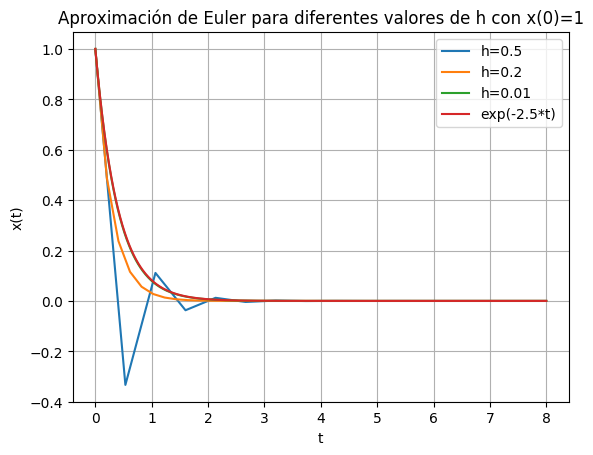

PyObject <matplotlib.legend.Legend object at 0x7f96fec83810>

In [10]:
# Graficamos las otras 3 aproximaciones que obtuvimos junto con la solución:

# Aproximaciones
plot(X2[1],X2[2], label="h=0.5")
plot(X3[1],X3[2], label="h=0.2")
plot(X4[1],X4[2], label="h=0.01")

# Solución
plot(T4,exp.(-2.5*T4), label="exp(-2.5*t)")

title("Aproximación de Euler para diferentes valores de h con x(0)=1")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

Se puede observar que la curva para $h=0.01$ ya no se distingue de la solución $x(t)=e^{-2.5t}$.

Resolvamos para la condición inicial $x(0)=2$:

In [11]:
# Definimos nuestra lista de elementos para una separación h dada:

S1 = listt(0,8,1)
S2 = listt(0,8,0.5)
S3 = listt(0,8,0.2)
S4 = listt(0,8,0.01)

0.0:0.010012515644555695:8.0

In [12]:
# Definimos una lista cuyos elementos son x(t_k) para un valor de h dado, con nuestra condición inicial x0=2:

Y1 = metodo_euler(f,2,S1)
Y2 = metodo_euler(f,2,S2)
Y3 = metodo_euler(f,2,S3)
Y4 = metodo_euler(f,2,S4)

(0.0:0.010012515644555695:8.0, [2.0, 1.94994, 1.90113, 1.85354, 1.80714, 1.76191, 1.71781, 1.67481, 1.63288, 1.59201  …  4.01482e-9, 3.91432e-9, 3.81634e-9, 3.72081e-9, 3.62768e-9, 3.53687e-9, 3.44834e-9, 3.36202e-9, 3.27787e-9, 3.19582e-9])

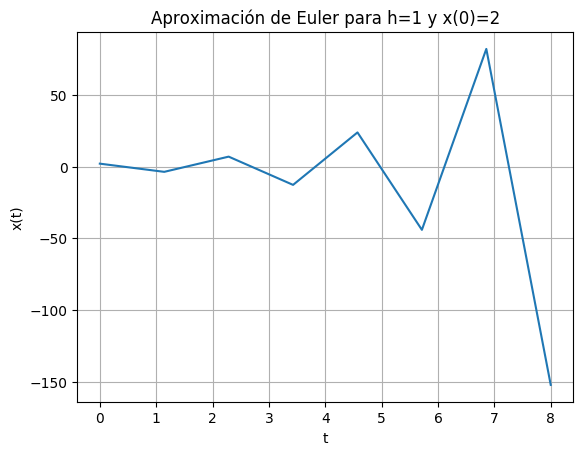

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [13]:
# Graficamos para h = 1.0

plot(S1,Y1[2])

title("Aproximación de Euler para h=1 y x(0)=2")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

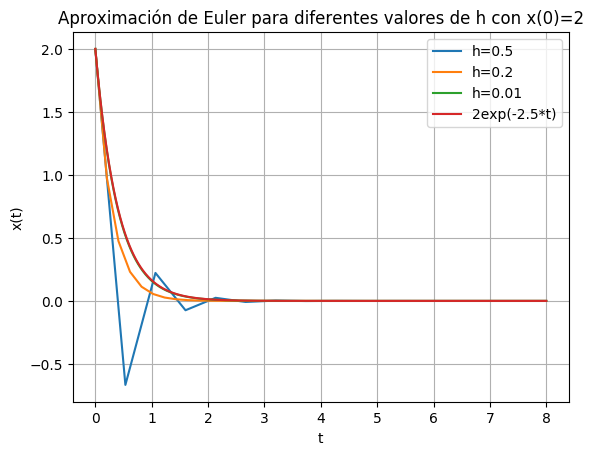

PyObject <matplotlib.legend.Legend object at 0x7f96feb12490>

In [14]:
# Graficamos las otras 3 aproximaciones que obtuvimos junto con la solución:

# Aproximaciones
plot(Y2[1],Y2[2], label="h=0.5")
plot(Y3[1],Y3[2], label="h=0.2")
plot(Y4[1],Y4[2], label="h=0.01")

# Solución
plot(T4,2*exp.(-2.5*T4), label="2exp(-2.5*t)")

title("Aproximación de Euler para diferentes valores de h con x(0)=2")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

## Ejercicio 2

¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

Supongamos que $k=k'/m$ y $k'> 0$. Propongamos la solución $$x(t) = A\sin(\omega t) + B \cos(\omega t)$$ donde $\omega^2 = k'/m$ y $A$, $B$ son constantes por determinar. Así que,

$$ x'(t) = A\omega\cos(\omega t) - B\omega \sin(\omega t)$$

$$ x''(t) = - A\omega^2\sin(\omega t) - B\omega^2 \cos(\omega t) = -\omega^2\left[A\sin(\omega t) + B \cos(\omega t)\right] $$

Sustituyendo en la ecuación diferencial,

$$ x''(t) + \frac{k'}{m}x(t) = -\omega^2\left[A\sin(\omega t) + B \cos(\omega t)\right] + \frac{k'}{m}\left[ A\sin(\omega t) + B \cos(\omega t)\right] = 0$$

ya que $\omega^2 = k'/m$. Sea $x(0) = x_0$ y $x'(0) = x'_0$. Entonces,

$$ x(0) = B \Rightarrow B = x_0$$

$$ x'(0) = A\omega \Rightarrow A = \frac{x'_0}{\omega}$$

Por lo tanto,

$$ x(t) = \frac{x'_0}{\omega}\sin(\omega t) + x_0 \cos(\omega t)$$

## Ejercicio 3

Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Sea $u(t) = x'(t)$. Entonces, $u'(t) = x''(t) = -kx$. De esta forma, obtenemos el siguiente sistema de ecuaciones:

$$ x'(t) = u(t)$$
$$u'(t) = -kx$$

De forma vectorial lo podemos escribir como

$$\frac{d\vec x}{dx} = \vec f(\vec x,t)$$

donde $\vec x = (x,u)$ y $\vec f(\vec x,t) = (u,-kx)$.

## Ejercicio 4

Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

Resolvamos el sistema de ecuaciones para el intervalo $[0,2\pi]$, $k=1$ e imponemos las condiciones inciales $x(0)=0$ y $u(0)=x'(0)=1$. Con estas condiciones iniciales y por la deducción hecha anteriormente, se tiene que $\omega=1$ y 

$$ x(t) = \sin(t)$$
$$ u(t) = x'(t) = \cos(t)$$

Así que

In [15]:
# Definimos nuestras listas con los valores de t

R1 = listt(0,4*pi,0.1)
R2 = listt(0,4*pi,0.05)
R3 = listt(0,4*pi,0.01)

0.0:0.010005072145190424:12.566370614359172

In [16]:
# Definimos las funciones que definen nuestra ecuación diferencial vectorial

g(x,u) = u
h(x,u) = -x

h (generic function with 1 method)

In [17]:
# Definimos una función para resolver una ecuación diferencial vectorial dada por g(x,u) y h(x,u) usando el método de Euler. Los parámetros son las funciones g y h, dos condiciones iniciales x0 = x(t0) y u0 = u(t0) y una lista de los elementos t_k

function metodo_euler2(f,g,x0,u0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    listu = zeros(length(listt)) # Lista vacía que contendrá los elementos u(t_k)
    
    h = listt[2]-listt[1] # Definimos un nuevo valor de h como la diferencia entre dos elementos consecutivos de la lista de los valores de t
    
    # Introducimos nuestras condiciones iniciales
    x = x0 
    u = u0
    
    # Introducimos nuestras condiciones iniciales x0 y u0 como los primeros elementos en la listas listx, listu respectivamente
    listx[1] = x0
    listu[1] = u0
    
    # Hacemos un ciclo que nos guarde los valores de x(t_(k+1)) y u(t_(k+1)) usando los valores de x(t_k) y u(t_k). Notemos que hay que calcular tanto x(t_k) como u(t_k) antes de calcular x(t_(k+1)) y u(t_(k+1)). Finalmente, los valores de x(t_k) y u(t_k) se guardan en las listas listx y listu respectivamente.
    
    for i in 2:length(listt)
        
        x = x + h*f(listx[i-1], listu[i-1]) # x(t) esta dado por g(x,u)
        u = u + h*g(listx[i-1], listu[i-1]) # u(t) esta dado por h(x,u)
        
        listx[i] = x
        listu[i] = u
        
    end
    
    return listx,listu
    
end

metodo_euler2 (generic function with 1 method)

In [18]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler2`

W1 = metodo_euler2(g,h,0,1,R1)
W2 = metodo_euler2(g,h,0,1,R2)
W3 = metodo_euler2(g,h,0,1,R3)

([0.0, 0.0100051, 0.0200101, 0.0300142, 0.0400163, 0.0500153, 0.0600104, 0.0700005, 0.0799845, 0.0899615  …  -0.0961563, -0.0855504, -0.074935, -0.0643109, -0.0536794, -0.0430414, -0.0323981, -0.0217504, -0.0110996, -0.000446481], [1.0, 1.0, 0.9999, 0.9997, 0.999399, 0.998999, 0.998499, 0.997898, 0.997198, 0.996398  …  1.06005, 1.06101, 1.06186, 1.06261, 1.06326, 1.06379, 1.06423, 1.06455, 1.06477, 1.06488])

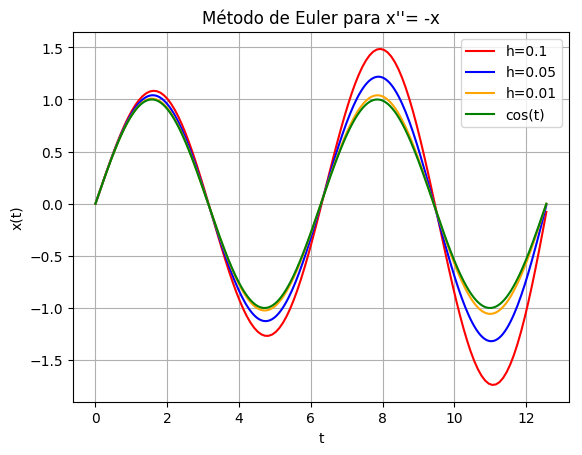

PyObject <matplotlib.legend.Legend object at 0x7f96fea0f190>

In [19]:
# Graficando las aproximaciones a x(t) para diferentes valores de h

plot(R1,W1[1], label="h=0.1", color="red")
plot(R2,W2[1], label="h=0.05", color="blue")
plot(R3,W3[1], label="h=0.01", color="orange")

plot(R3,sin.(R3), label="cos(t)", color="green")

title("Método de Euler para x''= -x")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

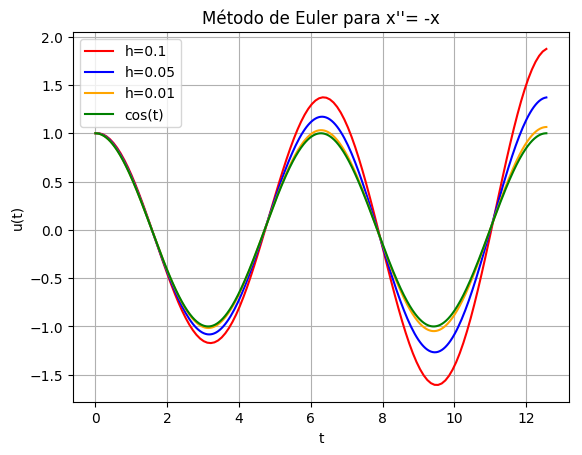

PyObject <matplotlib.legend.Legend object at 0x7f96fe906cd0>

In [20]:
# Graficando las aproximaciones de u(t) para diferentes valores de h

plot(R1,W1[2], label="h=0.1", color="red")
plot(R2,W2[2], label="h=0.05", color="blue")
plot(R3,W3[2], label="h=0.01", color="orange")

plot(R3,cos.(R3), label="cos(t)", color="green")

title("Método de Euler para x''= -x")
xlabel("t")
ylabel("u(t)")

grid("on")
legend()

De ambas graficas se puede observar que mientras mayor sea el valor de $t$, mayor es el error de la aproximación. 

## Ejercicio 5

Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

Para resolver esta ecuación diferencial, consideremos el intervalo $[0,6]$ e imponemos la condición inicial $x(0)=4$. Entonces,

In [21]:
# Definimos la función que define nuestra ecuación diferencial

f1(t,x) = (2x - 18t)/(1+t)

f1 (generic function with 1 method)

La aproximación a la solución se hace con los valores $h = 0.1,0.05,0.01,0.001$. Se hacen las listas con los valores de t usando la función de `listt`:

In [22]:
U1 = listt(0,6,0.1)
U2 = listt(0,6,0.05)
U3 = listt(0,6,0.01)
U4 = listt(0,6,0.001)

0.0:0.0010001666944490749:6.0

Evaluando las listas anteriores en la función `metodo_euler(f,x0,listt)`:

In [23]:
Z1 = metodo_euler(f1,4,U1)
Z2 = metodo_euler(f1,4,U2)
Z3 = metodo_euler(f1,4,U3)
Z4 = metodo_euler(f1,4,U4)

(0.0:0.0010001666944490749:6.0, [4.0, 4.008, 4.01599, 4.02397, 4.03195, 4.03991, 4.04786, 4.0558, 4.06373, 4.07165  …  -127.323, -127.375, -127.427, -127.479, -127.531, -127.582, -127.634, -127.686, -127.738, -127.79])

Verificando que `U1` = `Z1[1]`

In [24]:
U1

0.0:0.1016949152542373:6.0

In [25]:
Z1[1]

0.0:0.1016949152542373:6.0

In [26]:
Z1[2]

60-element Array{Float64,1}:
    4.0    
    4.81356
    5.53325
    6.15906
    6.691  
    7.12907
    7.47327
    7.7236 
    7.88005
    7.94263
    7.91134
    7.78618
    7.56714
    ⋮      
  -62.837  
  -66.5293 
  -70.3155 
  -74.1956 
  -78.1695 
  -82.2373 
  -86.399  
  -90.6545 
  -95.0039 
  -99.4472 
 -103.984  
 -108.615  

Graficando las aproximaciones junto con la solución $x(t)=4 + 8t - 5t^2$:

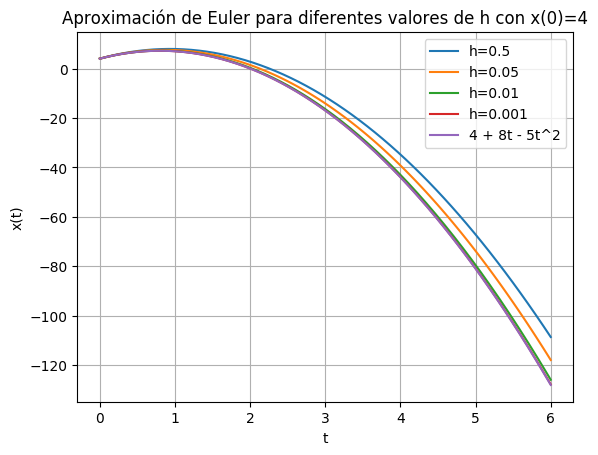

PyObject <matplotlib.legend.Legend object at 0x7f96fe814650>

In [27]:
# Graficamos las 4 curvas que obtuvimos junto con la solución:

# Aproximaciones
plot(Z1[1],Z1[2], label="h=0.5")
plot(Z2[1],Z2[2], label="h=0.05")
plot(Z3[1],Z3[2], label="h=0.01")
plot(Z4[1],Z4[2], label="h=0.001")


# Solución
plot(U1,4 + 8U1 - 5U1.^2, label="4 + 8t - 5t^2")

title("Aproximación de Euler para diferentes valores de h con x(0)=4")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

Se puede observa que la curva roja que corresponde a un valor de $h=0.001$ no se distingue de la solución real en el intervalo $[0,6]$.